In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
from fpfs import pltutil
import numpy as np
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [2]:
#nver='var1em9' # 'var0em0'#
# read noiseless data
mm1=[]
mm2=[]
for _i in range(8):
    nver='var0em0' # 'var0em0'#
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    nver='var7em3' # 'var0em0'#
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

12

In [3]:
gc.collect()
pix_scale=0.168
clist=np.logspace(-1.8,0.2,12)/pix_scale**2.
shapenoi=np.zeros(len(clist))
totnoise=np.zeros(len(clist))
for it,Const in enumerate(clist):
    noirev =   False
    ellM1  =   fpfs.catalog.fpfsM2E(mm1,const=Const,noirev=noirev)
    noirev =   False
    ellM2  =   fpfs.catalog.fpfsM2E(mm2,const=Const,noirev=noirev)
    shapenoi[it]=np.sqrt(np.average(ellM1['fpfs_e1']**2.))/np.average((ellM1['fpfs_R1E']+ellM1['fpfs_R2E'])/2.)
    totnoise[it]=np.sqrt(np.average(ellM2['fpfs_e1']**2.))/np.average((ellM1['fpfs_R1E']+ellM1['fpfs_R2E'])/2.)
    del ellM1,ellM2

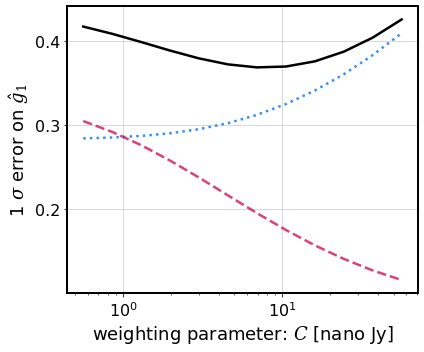

In [4]:
plt.close()
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
ax.plot(clist,totnoise,color=pltutil.colors[0],ls='-',linewidth=2.5)
ax.plot(clist,shapenoi,color=pltutil.colors[1],ls=':',linewidth=2.5)
ax.plot(clist,np.sqrt(totnoise**2-shapenoi**2),color=pltutil.colors[2],ls='--',linewidth=2.5)
ax.set_xscale('log')
ax.set_xlabel('weighting parameter: $C$ [nano Jy]')
ax.set_ylabel('1 $\sigma$ error on $\hat{g}_1$')
ax.set_yticks([0.2,0.3,0.4])
ax.grid()
fig.tight_layout()
fig.savefig('optimalC.pdf')

In [29]:
pwd


'/lustre/work/xiangchong.li/work/FPFS2/sdet_notebooks/ipynb/5_paper_2022/3_test_2/1_isolated_force'

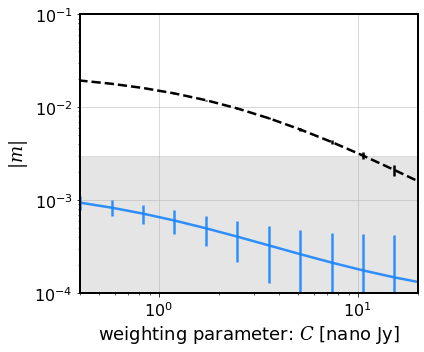

In [28]:
plt.close()
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]


outcomes=fitsio.read('center_constC.fits')
ave=np.average(outcomes,axis=0)
std=np.std(outcomes,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[3,:]/0.04-1
yerr=std[1,:]/ave[3,:]/0.04/np.sqrt(len(outcomes))
ax.errorbar(x,np.abs(y1),yerr,color=pltutil.colors[0],ls='--',linewidth=2.5)

outcomes=fitsio.read('center_constC_noirev.fits')
ave=np.average(outcomes,axis=0)
std=np.std(outcomes,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[3,:]/0.04-1
yerr=std[1,:]/ave[3,:]/0.04/np.sqrt(len(outcomes))
ax.errorbar(x,np.abs(y1),yerr,color=pltutil.colors[1],ls='-',linewidth=2.5)


ax.axhspan(0.,0.003,0,100,color='gray',alpha=0.2)
ax.grid()

ax.set_xlim(0.4,20)
ax.set_ylim(1e-4,1e-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('weighting parameter: $C$ [nano Jy]')
ax.set_ylabel('$|m|$')
fig.tight_layout()
fig.savefig('noiseBias.pdf')

In [6]:
ave.shape

(4, 20)

In [10]:
x

array([ 0.03162278,  0.04548778,  0.06543189,  0.0941205 ,  0.13538762,
        0.1947483 ,  0.28013568,  0.40296113,  0.5796394 ,  0.83378222,
        1.19935395,  1.72521055,  2.48162892,  3.56969885,  5.13483291,
        7.38619982, 10.62467831, 15.28306733, 21.98392649, 31.6227766 ])

In [11]:
y1

array([-0.0013532 , -0.00132965, -0.00130118, -0.00125443, -0.00119771,
       -0.00112622, -0.0010395 , -0.00093953, -0.00083005, -0.00071619,
       -0.00060366, -0.00049834, -0.00040499, -0.00032628, -0.0002627 ,
       -0.00021314, -0.00017556, -0.00014763, -0.00012706, -0.00011192])